# GLMCC example

In [1]:
import sys
import pandas as pd

sys.path.append('../')

from glmcc import GLMCC  # model
from glmcc import spiketime_relative  # useful functions

load sample data with pandas.  
This sample data is taken from the [original code](https://github.com/NII-Kobayashi/GLMCC) and edited by the author.  
Note that "spiketime" should be in msec scale, not sec scale.

In [2]:
df = pd.read_csv('./sample_data.csv')  # spike train in sec scale
df.head()

,neuron,spiketime
0,1,20.95
1,1,93.55
2,1,107.40
3,1,116.45
4,1,218.45


Tuning synaptic delay is important for successful fitting of GLM.  
I recommend tuning it by seeing the CC histogram and maximum log posterior of fitted GLM.  
In model summary, threshold indicates the value which fitted J should exceed to pass the statistical test.

iterations needed: 5


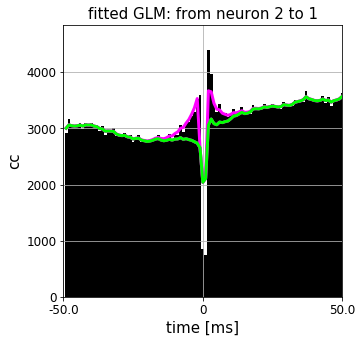

--- glmcc summary ---
connectivity from neuron j to neuron i
estimated J_ij, J_ji: 0.18, 0.25
threshold J_ij, J_ji: 0.05, 0.05
max log posterior: 2229003


In [3]:
# prepare relative spiketime (target neuron - reference neuron)
t_sp = spiketime_relative(spiketime_tar=list(df.query('neuron==1').spiketime), 
                          spiketime_ref=list(df.query('neuron==2').spiketime), window_size=50.0)

glm = GLMCC(delay=2.0)  # tune synaptic delay
glm.fit(t_sp)
glm.plot(t_sp, title='fitted GLM: from neuron 2 to 1')

# print model summary
glm.summary()

iterations needed: 18


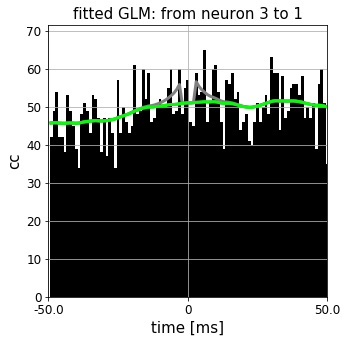

--- glmcc summary ---
connectivity from neuron j to neuron i
estimated J_ij, J_ji: 0.1, 0.09
threshold J_ij, J_ji: 0.36, 0.36
max log posterior: 14486


In [4]:
t_sp = spiketime_relative(spiketime_tar=list(df.query('neuron==1').spiketime), 
                          spiketime_ref=list(df.query('neuron==3').spiketime), window_size=50.0)

glm = GLMCC(delay=3.0)
glm.fit(t_sp)
glm.plot(t_sp, title='fitted GLM: from neuron 3 to 1')
glm.summary()

iterations needed: 18


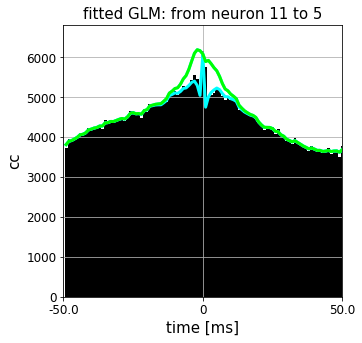

--- glmcc summary ---
connectivity from neuron j to neuron i
estimated J_ij, J_ji: -0.22, -0.2
threshold J_ij, J_ji: 0.03, 0.03
max log posterior: 3304611


In [5]:
t_sp = spiketime_relative(spiketime_tar=list(df.query('neuron==5').spiketime), 
                          spiketime_ref=list(df.query('neuron==11').spiketime), window_size=50.0)

glm = GLMCC(delay=1.0)
glm.fit(t_sp)
glm.plot(t_sp, title='fitted GLM: from neuron 11 to 5')
glm.summary()